## Introduction & Executive summary.

In this file, we included all exploratory analysis before the milestone 1. It includes boxplot chart and line chart of prices, correlation heatmap, clustering, preliminary regression analysis, and preliminary time-series analysis. Some of those analysises contain misguided efforts such as taking regression not by price % changes but by price itself, and taking time-series analysis without the consideration of data stationality. However, for record-keeping purpose and for showing our step-by-step progress, we kept those process in this file too.

After implementing those exploratory analysis, we could come up with further analysis after the milestone 1. We could summarize future direction and goal of our project after those exploratory analysis as the bottom line of this file's preliminary analysis at the end of milestone 1.



**Team 12: Data Scientist track.**

**Team Member:**
*   Deng Lingzhe	e0674597@u.nus.edu
*   GOH ZHEN HAO	e0486543@u.nus.edu
*   NAOYA OHARA	e0395606@u.nus.edu

In [1]:
#It's for google colab usage on google drive.
#Ignore or change folder path that corresponds to your environment.
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

COLAB_PATH = '/content/drive/My Drive/IT5006/FinalPackage'

import sys, os
sys.path.append(COLAB_PATH)
print(sys.path)
## change directory to the path above
os.chdir(COLAB_PATH)

Mounted at /content/drive
['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/IT5006/FinalPackage']


### dataset

The data set comes from team12_clearndata.csv, the file which we've created from various datasources with DATACLEANING.ipynb. The list of data is shown as follows.

---
 
*   CoinGecko Open Data: Daily Trading Volume and Closing Price  (BTC,ETH,XRP, LTC)


*   SPDR Gold Shares (i.e. The most popular gold ETF), Historical Index Data: Daily Trading Volume and Closing Price 

*   Nasdaq Data: S&P500 as major equity market index, Nasdaq100 as major technology index. Daily Trading Volume and Priced data.

*   Federal Reserve Interest Rate Data: US 10 year government bond yield, daily interest rate data.

*   Yahoo Finance Index: US Dollar Index (Value of US dollar relative to a basket of other major currencies e.g. EUR, JPY etc)

### Importing Libraries

Here we are importing libraries required for our exploratory analysis in milestone 1.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import array
import datetime
import random

In [3]:
# Here we are trying to set the float data's to 4 decimal place, by following financial market's business custom.
pd.options.display.float_format = '{:.4f}'.format

## Collecting Full Dataset from team12_cleandata.csv.

In [4]:
main_df = pd.read_csv("./team12_cleandata.csv")
main_df.describe()

,Unnamed: 0,btc_price,btc_mktcap,btc_volume,eth_price,eth_mktcap,eth_volume,xrp_price,xrp_mktcap,xrp_volume,ltc_price,ltc_mktcap,ltc_volume,btc_price_chg,btc_mktcap_chg,btc_volume_chg,eth_price_chg,eth_mktcap_chg,eth_volume_chg,xrp_price_chg,xrp_mktcap_chg,xrp_volume_chg,ltc_price_chg,ltc_mktcap_chg,ltc_volume_chg,btc_vol20d,eth_vol20d,xrp_vol20d,ltc_vol20d,btc_vol60d,eth_vol60d,xrp_vol60d,ltc_vol60d,btc_SMA10d,eth_SMA10d,xrp_SMA10d,ltc_SMA10d,btc_SMA50d,eth_SMA50d,xrp_SMA50d,...,spx_SMA50d,ndx_SMA50d,gold_SMA50d,us10y_SMA50d,dxy_SMA50d,spx_SMA100d,ndx_SMA100d,gold_SMA100d,us10y_SMA100d,dxy_SMA100d,spx_SMA200d,ndx_SMA200d,gold_SMA200d,us10y_SMA200d,dxy_SMA200d,spx_DiffSMA10d,ndx_DiffSMA10d,gold_DiffSMA10d,us10y_DiffSMA10d,dxy_DiffSMA10d,spx_DiffSMA50d,ndx_DiffSMA50d,gold_DiffSMA50d,us10y_DiffSMA50d,dxy_DiffSMA50d,spx_DiffSMA100d,ndx_DiffSMA100d,gold_DiffSMA100d,us10y_DiffSMA100d,dxy_DiffSMA100d,spx_DiffSMA200d,ndx_DiffSMA200d,gold_DiffSMA200d,us10y_DiffSMA200d,dxy_DiffSMA200d,spx_RSI,ndx_RSI,gold_RSI,us10y_RSI,dxy_RSI
count,2405.0000,2405.0000,2405.0000,2405.0000,1692.0000,1692.0000,1692.0000,2321.0000,2321.0000,2321.0000,2405.0000,2405.0000,2405.0000,2404.0000,2404.0000,2195.0000,1691.0000,1691.0000,1691.0000,2320.0000,2320.0000,2195.0000,2404.0000,2404.0000,2195.0000,2387.0000,1675.0000,2303.0000,2387.0000,2353.0000,1641.0000,2269.0000,2353.0000,2397.0000,1685.0000,2313.0000,2397.0000,2363.0000,1650.0000,2279.0000,...,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2305.0000,2305.0000,2305.0000,2305.0000,2305.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000,2305.0000,2305.0000,2305.0000,2305.0000,2305.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000
mean,1202.0000,4114.2827,72085515758.0490,7581564946.9585,223.0045,22889801277.2204,4209723638.9908,0.1981,8006358870.4875,742002517.0737,39.3451,2248936294.7284,905228776.7563,0.0027,0.0029,0.2080,0.0049,0.0052,0.2295,0.0044,0.0056,0.2166,0.0025,0.0030,0.1954,0.5660,0.8608,0.9166,0.8252,0.5979,0.8995,0.9900,0.8809,4084.9766,222.3742,0.1985,39.2885,3991.8709,220.7913,0.1976,...,2393.0289,5847.4134,1332.6376,2.1620,92.9638,2372.5769,5753.4229,1329.7883,2.1735,92.8471,2368.2230,5696.2786,1314.6010,2.2086,93.0537,0.0017,0.0029,0.0006,-0.0008,0.0002,0.0090,0.0156,0.0023,-0.0046,0.0010,0.0178,0.0311,0.0042,-0.0103,0.0024,0.0335,0.0612,0.0139,-0.0339,0.0055,56.5098,57.5700,50.9562,49.5460,50.8802
std,694.4080,4704.0514,85089582165.1142,12682941626.7253,232.0571,23349268693.9253,5961082655.9971,0.2980,11794149545.5707,1591515514.5605,49.9277,2892431057.0131,1458081097.0409,0.0417,0.0417,4.9418,0.0648,0.0647,4.0102,0.0802,0.0942,0.9949,0.0662,0.0663,2.0782,0.3097,0.4166,0.7948,0.5914,0.2498,0.3198,0.6846,0.5201,4606.0905,230.1287,0.2947,49.5273,4327.6941,221.1406,0.2721,...,496.2645,2180.6344,186.4715,0.6137,6.4226,487.1610,2105.5009,177.0688,0.5870,6.4522,455.7418,1921.7398,151.9143,0.5288,6.2143,0.0150,0.0169,0.0141,0.0418,0.0065,0.0330,0.0367,0.0323,0.0899,0.0141,0.0414,0.0473,0.0462,0.1318,0.0215,0.0480,0.0595,0.0596,0.1832,0.0332,12.7760,12.8267,14.1222,12.8200,13.3306
min,0.0000,68.0831,774804401.0000,0.0000,0.4330,0.0000,87074.7996,0.0027,21944813.4321,0.0000,1.1489,38286159.0000,0.0000,-0.3519,-0.3578,-0.9959,-0.4833,-0.4827,-0.9900,-0.5988,-0.4067,-0.8995,-0.4214,-0.4209,-0.9921,0.0968,0.2254,0.1422,0.0871,0.1620,0.4025,0.2906,0.1451,79.0102,0.5146,0.0033,1.3374,94.9140,0.7286,0.0039,...,1554.4250,2797.0750,1071.4740,0.6286,79.7964,1523.0785,2767.9025,1099.5560,0.6595,79.9844,1584.2157,2885.0912,1116.0042,0.6970,80.2386,-0.1469,-0.1351,-0.0813,-0.4398,-0.0282,-0.2710,-0.2128,-0.1369,-0.6389,-0.0382,-0.2915,-0.2046,-0.1833,-0.6759,-0.0517,-0.2744,-0.1756,-0.1219,-0.6825,-0.0654,14.8166,16.4890,13.9896,5.0490,14.4277
25%,601.0000,416.8500,5852736452.3250,65970400.0000,12.6622,1042573704.5202,23016564.9469,0.0069,2172587

In [5]:
del main_df['Unnamed: 0']
main_df.head()

,day,btc_price,btc_mktcap,btc_volume,eth_price,eth_mktcap,eth_volume,xrp_price,xrp_mktcap,xrp_volume,ltc_price,ltc_mktcap,ltc_volume,btc_price_chg,btc_mktcap_chg,btc_volume_chg,eth_price_chg,eth_mktcap_chg,eth_volume_chg,xrp_price_chg,xrp_mktcap_chg,xrp_volume_chg,ltc_price_chg,ltc_mktcap_chg,ltc_volume_chg,btc_vol20d,eth_vol20d,xrp_vol20d,ltc_vol20d,btc_vol60d,eth_vol60d,xrp_vol60d,ltc_vol60d,btc_SMA10d,eth_SMA10d,xrp_SMA10d,ltc_SMA10d,btc_SMA50d,eth_SMA50d,xrp_SMA50d,...,spx_SMA50d,ndx_SMA50d,gold_SMA50d,us10y_SMA50d,dxy_SMA50d,spx_SMA100d,ndx_SMA100d,gold_SMA100d,us10y_SMA100d,dxy_SMA100d,spx_SMA200d,ndx_SMA200d,gold_SMA200d,us10y_SMA200d,dxy_SMA200d,spx_DiffSMA10d,ndx_DiffSMA10d,gold_DiffSMA10d,us10y_DiffSMA10d,dxy_DiffSMA10d,spx_DiffSMA50d,ndx_DiffSMA50d,gold_DiffSMA50d,us10y_DiffSMA50d,dxy_DiffSMA50d,spx_DiffSMA100d,ndx_DiffSMA100d,gold_DiffSMA100d,us10y_DiffSMA100d,dxy_DiffSMA100d,spx_DiffSMA200d,ndx_DiffSMA200d,gold_DiffSMA200d,us10y_DiffSMA200d,dxy_DiffSMA200d,spx_RSI,ndx_RSI,gold_RSI,us10y_RSI,dxy_RSI
0,2013-04-28,135.3000,1500517590.0000,0.0000,nan,nan,nan,nan,nan,nan,4.2998,73773387.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,1554.4250,2797.0750,1545.0000,1.8590,82.5992,1523.0785,2767.9025,1597.4525,1.9042,81.4073,nan,nan,nan,nan,nan,0.0096,0.0108,0.0325,-0.0139,-0.0026,0.0142,0.0119,-0.0476,-0.0855,-0.0014,0.0351,0.0226,-0.0788,-0.1072,0.0132,nan,nan,nan,nan,nan,56.7657,55.7151,45.5074,35.5147,48.3449
1,2013-04-29,141.9600,1575032004.0000,0.0000,nan,nan,nan,nan,nan,nan,4.3594,74936909.0000,0.0000,0.0492,0.0497,nan,nan,nan,nan,nan,nan,nan,0.0139,0.0158,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,1555.8600,2799.2800,1542.7050,1.8558,82.5960,1524.4135,2769.1075,1595.1900,1.9026,81.4303,nan,nan,nan,nan,nan,0.0144,0.0178,0.0243,-0.0122,-0.0060,0.0208,0.0213,-0.0487,-0.0840,-0.0054,0.0419,0.0325,-0.0800,-0.1065,0.0088,nan,nan,nan,nan,nan,60.8551,60.6802,44.5890,35.5147,42.8319
2,2013-04-30,135.3000,1501657493.0000,0.0000,nan,nan,nan,nan,nan,nan,4.1829,72037636.0000,0.0000,-0.0469,-0.0466,nan,nan,nan,nan,nan,nan,nan,-0.0405,-0.0387,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,1557.3900,2801.9500,1540.4400,1.8526,82.5844,1525.8060,2770.6700,1593.0850,1.9004,81.4433,nan,nan,nan,nan,nan,0.0138,0.0212,0.0200,-0.0111,-0.0101,0.0229,0.0287,-0.0464,-0.0824,-0.0103,0.0440,0.0403,-0.0779,-0.1055,0.0035,nan,nan,nan,nan,nan,62.4033,64.2059,45.0369,35.5147,37.0423
3,2013-05-01,117.0000,1298951550.0000,0.0000,nan,nan,nan,nan,nan,nan,3.6491,62957992.0000,0.0000,-0.1353,-0.1350,nan,nan,nan,nan,nan,nan,nan,-0.1276,-0.1260,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,1558.4500,2804.0800,1538.0500,1.8482,82.5728,1527.0265,2772.2300,1591.1525,1.8977,81.4547,nan,nan,nan,nan,nan,0.0033,0.0129,0.0066,-0.0304,-0.0099,0.0137,0.0232,-0.0542,-0.1018,-0.0113,0.0345,0.0349,-0.0857,-0.1253,0.0023,nan,nan,nan,nan,nan,55.7765,60.8569,41.5966,30.1364,35.9218
4,2013-05-02,103.4300,1148667722.0000,0.0000,nan,nan,nan,nan,nan,nan,3.3888,58565340.0000,0.0000,-0.1160,-0.1157,nan,nan,nan,nan,nan,nan,nan,-0.0713,-0.0698,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,1559.5100,2806.1150,1535.8400,1.8434,82.5752,1528.3695,2774.1200,1589.3650,1.8950,81.4718,nan,nan,nan,nan,nan,0.0082,0.0198,0.0122,-0.0264,-0.0024,0.0208,0.0342,-0.0434,-0.0995,-0.0044,0.0416,0.0461,-0.0756,-0.1240,0.0091,nan,nan,nan,nan,nan,60.0052,65.6610,46.1078,30.1364,46.8811


### Understanding the Dataset

In [6]:
main_df.shape

(2405, 140)

In [7]:
main_df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 140 columns):
 #   Column             Dtype  
---  ------             -----  
 0   day                object 
 1   btc_price          float64
 2   btc_mktcap         float64
 3   btc_volume         float64
 4   eth_price          float64
 5   eth_mktcap         float64
 6   eth_volume         float64
 7   xrp_price          float64
 8   xrp_mktcap         float64
 9   xrp_volume         float64
 10  ltc_price          float64
 11  ltc_mktcap         float64
 12  ltc_volume         float64
 13  btc_price_chg      float64
 14  btc_mktcap_chg     float64
 15  btc_volume_chg     float64
 16  eth_price_chg      float64
 17  eth_mktcap_chg     float64
 18  eth_volume_chg     float64
 19  xrp_price_chg      float64
 20  xrp_mktcap_chg     float64
 21  xrp_volume_chg     float64
 22  ltc_price_chg      float64
 23  ltc_mktcap_chg     float64
 24  ltc_volume_chg     float64
 25  btc_vol20d         floa

In [8]:
#change data type of 'day' from object to datetime, to handle time series data.
main_df['day'] = pd.to_datetime(main_df['day'], format="%Y-%m-%d")

## Exploratory analysis and data visualization for the prices

In [9]:
#Obtain price data from our full dataset.
price_df = main_df.loc[:,['day', 'btc_price', 'eth_price', 'xrp_price', 'ltc_price', 'spx_price', 'ndx_price', 'gold_price', 'dxy_price']]
price_df.head()

,day,btc_price,eth_price,xrp_price,ltc_price,spx_price,ndx_price,gold_price,dxy_price
0,2013-04-28,135.3000,nan,nan,4.2998,1576.5000,2830.5000,1471.5000,82.4800
1,2013-04-29,141.9600,nan,nan,4.3594,1588.2500,2859.0000,1467.5000,82.1500
2,2013-04-30,135.3000,nan,nan,4.1829,1593.0000,2882.2500,1469.0000,81.7300
3,2013-05-01,117.0000,nan,nan,3.6491,1579.7500,2869.0000,1454.7500,81.6400
4,2013-05-02,103.4300,nan,nan,3.3888,1592.0000,2902.0000,1469.2500,82.2100


In [10]:
price_df.isnull().sum()

day             0
btc_price       0
eth_price     713
xrp_price      84
ltc_price       0
spx_price       0
ndx_price       0
gold_price      0
dxy_price       0
dtype: int64

As we can see from the above, we have some null values for eth and xrp price we will have to explore and understand what was the period where the price was not available.

In [11]:
earliest_eth_nan = price_df[pd.isnull(price_df['eth_price'])]['day'].min()
latest_eth_nan = price_df[pd.isnull(price_df['eth_price'])]['day'].max()

earliest_xrp_nan = price_df[pd.isnull(price_df['xrp_price'])]['day'].min()
latest_xrp_nan = price_df[pd.isnull(price_df['xrp_price'])]['day'].max()

print("Earliest NaN value of ETH is {0}. Latest NaN value of ETH is {1}.\n\
 Earliest NaN value of XRP is {2}. Latest NaN value of XRP is {3}.".format(
    earliest_eth_nan, latest_eth_nan, earliest_xrp_nan, latest_xrp_nan
))

Earliest NaN value of ETH is 2013-04-28 00:00:00. Latest NaN value of ETH is 2015-08-06 00:00:00.
 Earliest NaN value of XRP is 2013-04-28 00:00:00. Latest NaN value of XRP is 2013-08-02 00:00:00.


From our qualitative research, Ehereum was started in 30 July 2015. and XRP, Ripple, begin in only late 2012. Thus we are not going to fill the null values with any data and continue making use of the current dataset.

References:

[Ethereum Wiki](https://en.wikipedia.org/wiki/Ethereum)

[Ripple Labs Wiki](https://en.wikipedia.org/wiki/Ripple_Labs)

In [12]:
#show data properties.
price_df.describe()

,btc_price,eth_price,xrp_price,ltc_price,spx_price,ndx_price,gold_price,dxy_price
count,2405.0000,1692.0000,2321.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000
mean,4114.2827,223.0045,0.1981,39.3451,2414.5723,5946.4163,1336.1229,93.0473
std,4704.0514,232.0571,0.2980,49.9277,510.0422,2269.2709,195.5627,6.4142
min,68.0831,0.4330,0.0027,1.1489,1568.2500,2830.5000,1049.4000,79.1400
25%,416.8500,12.6622,0.0069,3.7507,2011.5000,4267.0000,1223.5000,90.2700
50%,1078.2747,180.6890,0.0387,20.3577,2341.7500,5347.5000,1283.8000,95.1700
75%,7538.5577,304.6159,0.2941,57.0756,2810.7500,7376.5000,1346.2500,97.4200
max,28837.2885,1410.0002,3.3984,360.6618,3748.7500,12885.5000,2067.1500,103.2900



From these Statistics we could see the high volatility of bitcoin, compared with mean value of the price. And it ignites the question of how such volatility will affect the other alternate digital-assets because the alternate coins are largely traded through bitcoin and possibly other traditional assets.

References:

[What are Alternate Digital Assets](https://www.thebalance.com/altcoins-a-basic-guide-391206)

[Crypto Trading Pairs, See "What is Base Currency and Why is it important?"](https://www.gemini.com/cryptopedia/what-are-cryptocurrency-pairs)

### Boxplot Diagram

We can better visualize the statistical parameters from the boxplot and the additional information that we see here are the outliers. **We can now understand and beaware of the property of outliers.** We can think about possible analysis from the outliers, **Qualitiative Research such as Tweets from Elon Mask?** as well as to think about **how we should handle those data points**.

Text(0.5, 1.0, 'Historical Price Statistics')

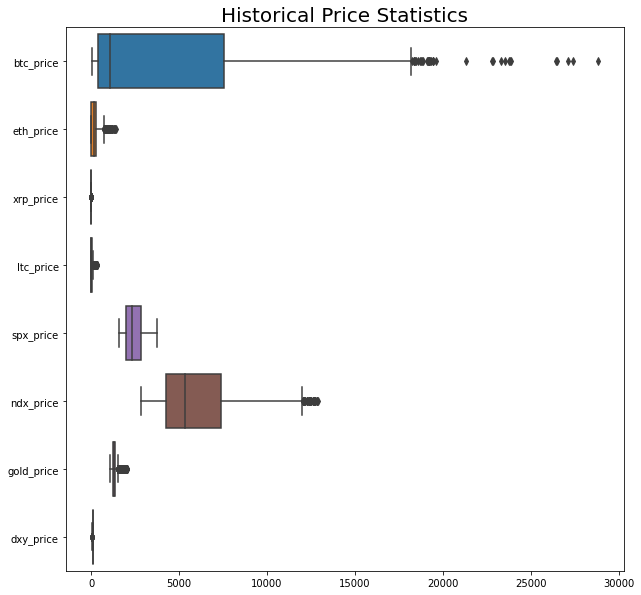

In [13]:
fig, axs = plt.subplots(figsize=(10,10))
sns.boxplot(data=price_df, orient="h").set_title("Historical Price Statistics", size=20)

### Line chart

Text(0.5, 1.0, 'Historical Price Movements')

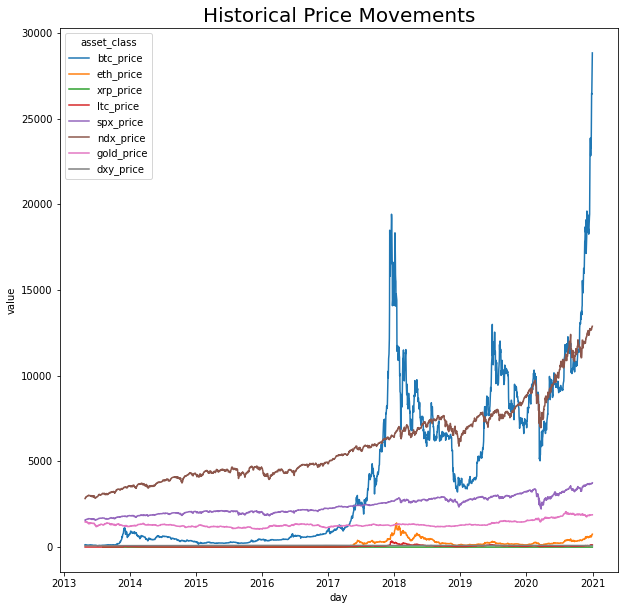

In [14]:
time_analysis_price_df = price_df.melt(
    id_vars=["day"], 
    var_name="asset_class"
)

fig, axs = plt.subplots(figsize=(10,10))
sns.lineplot(data=time_analysis_price_df, x="day", y="value", hue="asset_class").set_title("Historical Price Movements", size=20)

We can depict graph in a different way. Below charts shows price and moving average (10, 50, 100, 200 days), volume, difference between price and moving averages, and RSI.

*   We can see that the volumes of crypto currencies have increased since year 2019. 
*   We can see that when difference between price and moving averages becomes large +tive, it can be overbought and vice versa. 
*   RSI is popular technical indicator between 0 - 100. If it's above 70-80, it can be overbought. If it's below 20-30, it can be oversold.



With the line plot diagram we can now visualize data properties of each prices, volumes, moving averages, and RSIs.

**Then those graphs lead us to futher curiosity if other economic factors and traditional assets drives the prices of bitcoin.** Maybe a relation between a weak US Dollar Index Movement Or the US bond yields drop in yield %?

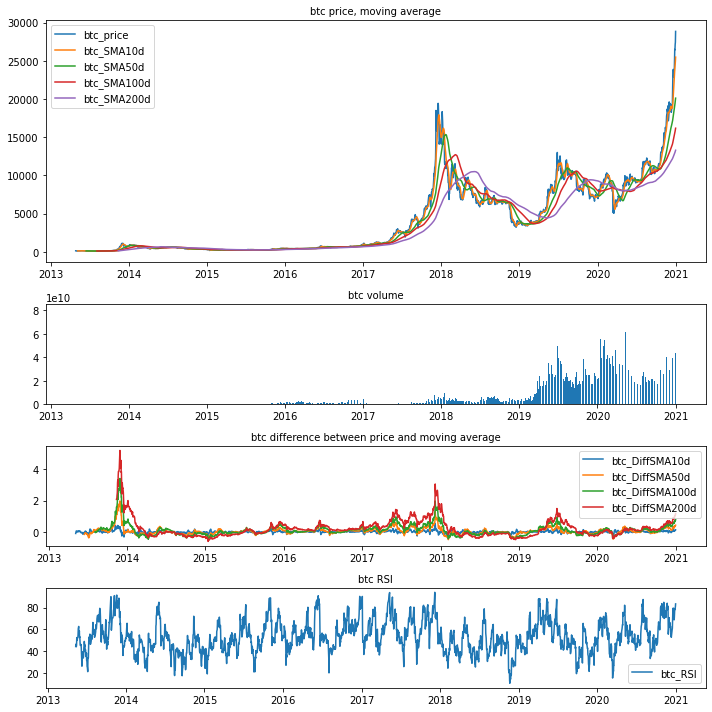

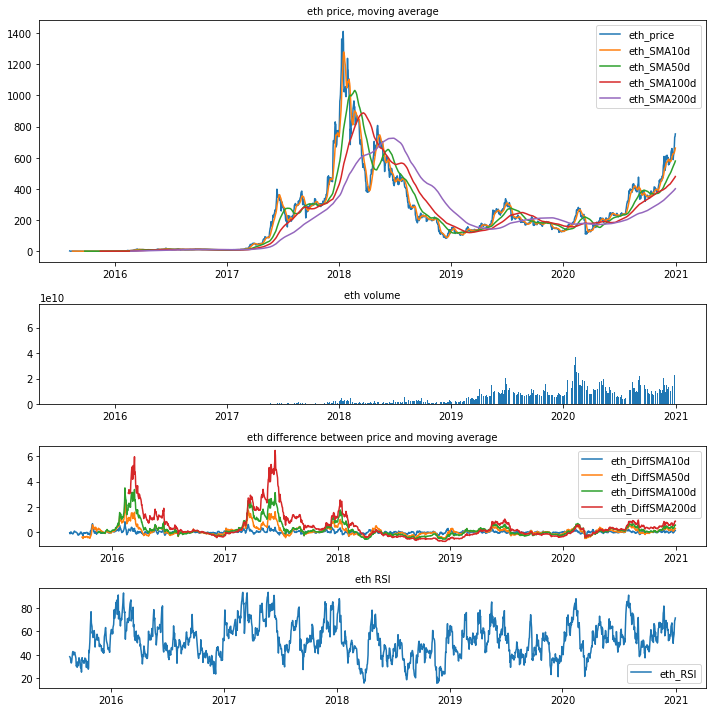

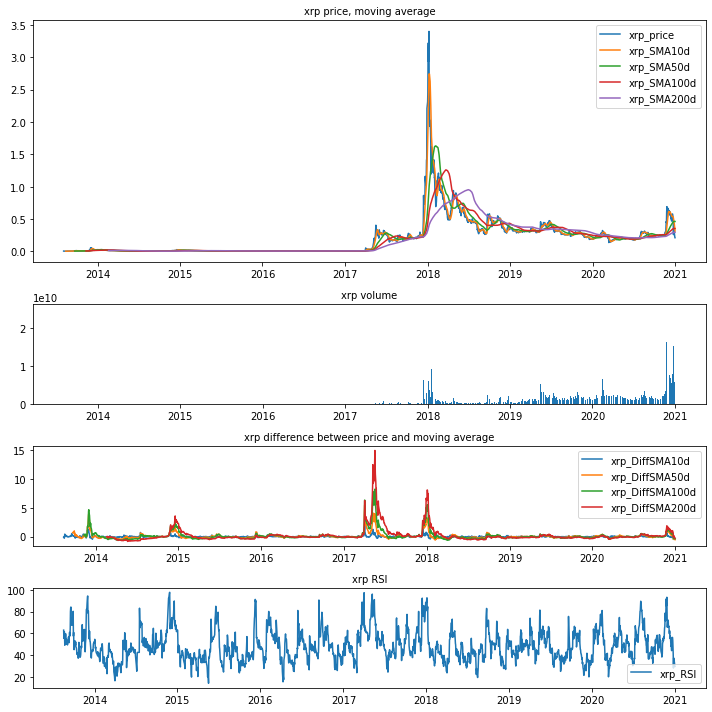

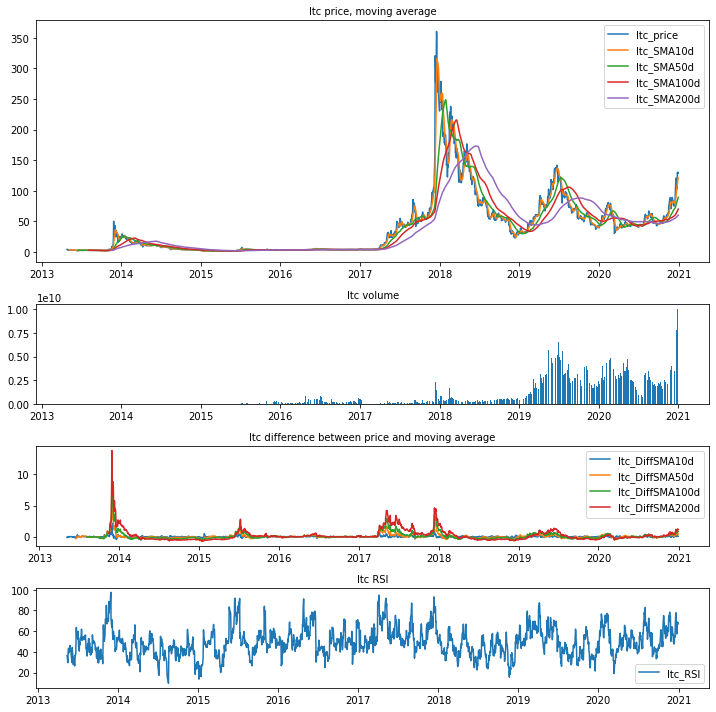

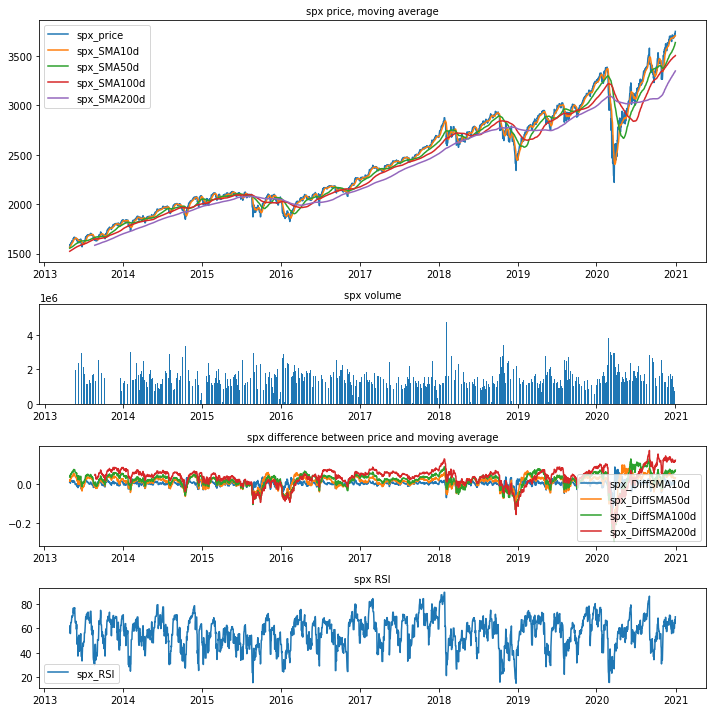

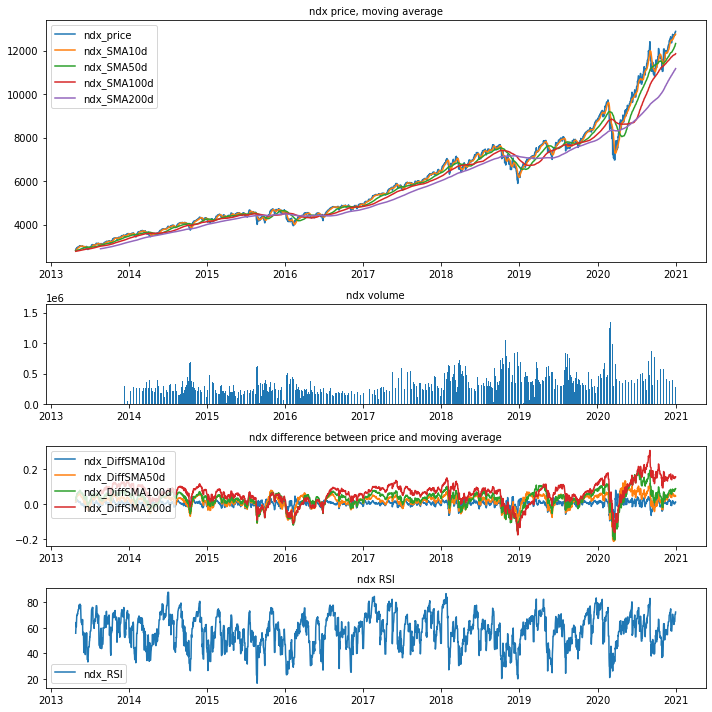

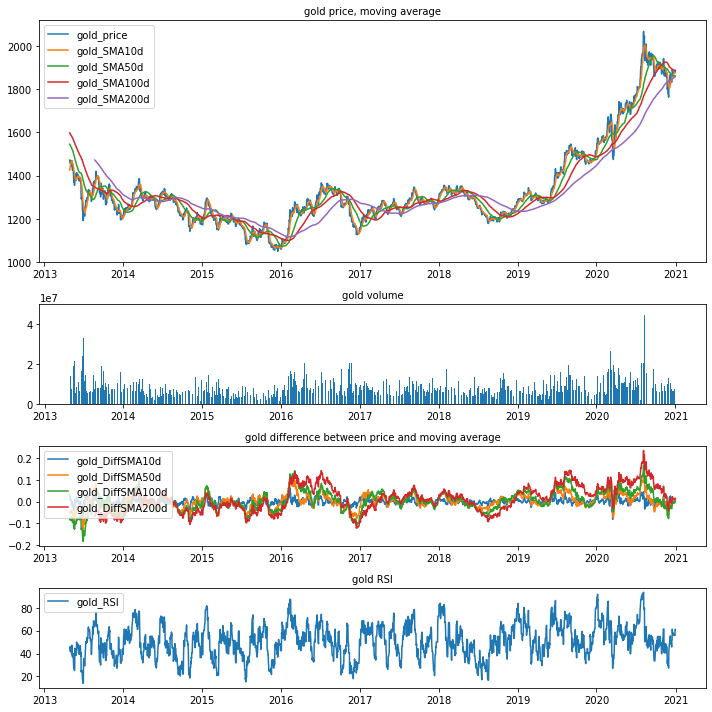

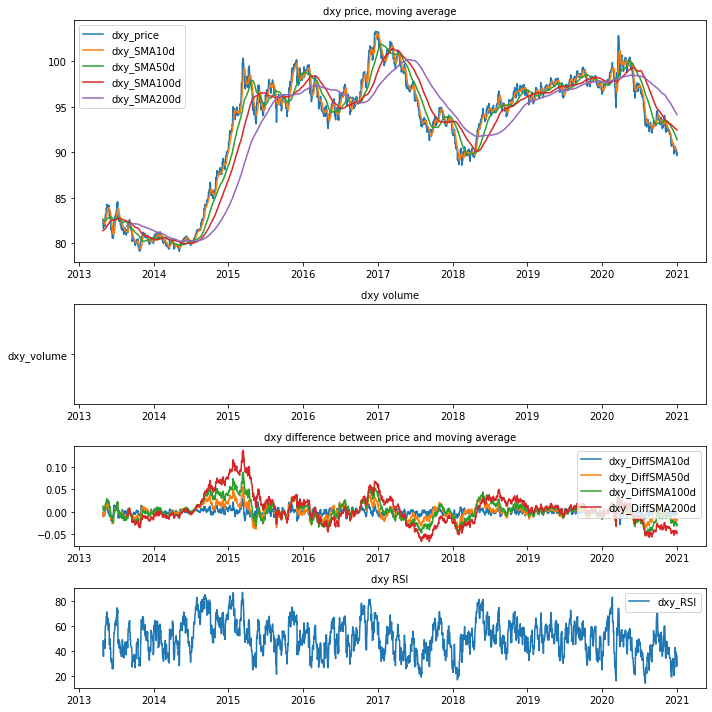

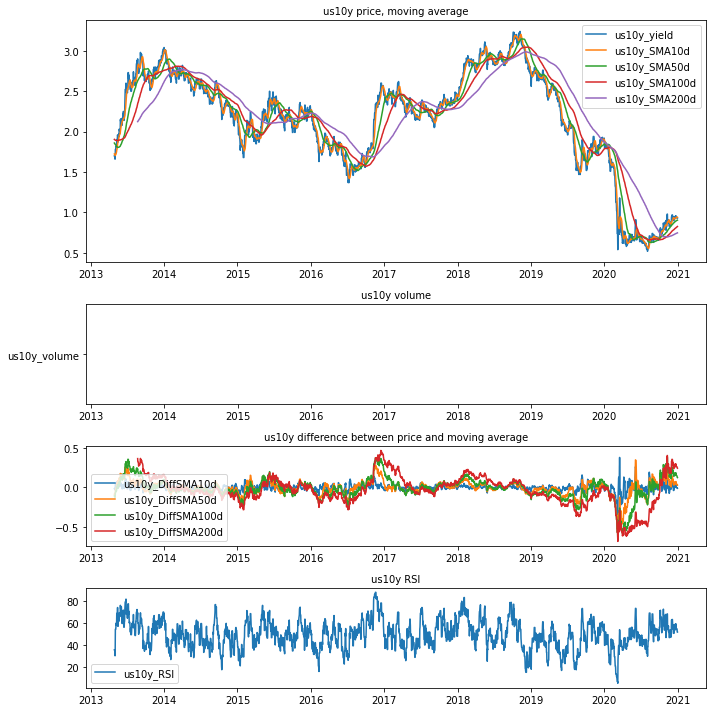

In [15]:
tickers = ['btc', 'eth', 'xrp', 'ltc', 'spx', 'ndx', 'gold', 'dxy', 'us10y']

for ticker in tickers:
  
  fig = plt.figure(figsize=(10,10))
  ax1 = plt.subplot2grid((5, 1), (0, 0), rowspan=2)
  ax2 = plt.subplot2grid((5, 1), (2, 0), rowspan=1)
  ax3 = plt.subplot2grid((5, 1), (3, 0), rowspan=1)
  ax4 = plt.subplot2grid((5, 1), (4, 0), rowspan=1)

  if ticker == 'us10y':
    ax1.plot('day',str(ticker + '_yield'), data=main_df)
  else:
    ax1.plot('day',str(ticker + '_price'), data=main_df)

  ax1.plot('day',str(ticker + '_SMA10d'), data=main_df)
  ax1.plot('day',str(ticker + '_SMA50d'), data=main_df)
  ax1.plot('day',str(ticker + '_SMA100d'), data=main_df)
  ax1.plot('day',str(ticker + '_SMA200d'), data=main_df)
  ax1.legend()
  ax1.set_title(str(ticker + ' price, moving average'), fontsize=10)

  ax2.bar('day',str(ticker + '_volume'), data=main_df)
  ax2.set_title(str(ticker + ' volume'), fontsize=10)

  ax3.plot('day',str(ticker + '_DiffSMA10d'), data=main_df)
  ax3.plot('day',str(ticker + '_DiffSMA50d'), data=main_df)
  ax3.plot('day',str(ticker + '_DiffSMA100d'), data=main_df)
  ax3.plot('day',str(ticker + '_DiffSMA200d'), data=main_df)
  ax3.legend()
  ax3.set_title(str(ticker + ' difference between price and moving average'), fontsize=10)

  ax4.plot('day',str(ticker + '_RSI'), data=main_df)
  ax4.legend()
  ax4.set_title(str(ticker + ' RSI'), fontsize=10)

  fig.tight_layout()

  plt.show()

## Exploratory analysis and data visualization for the price % change, rather than the price itself.

In [16]:
#We obtain price % change only from our full datasets.
price_pchg_df = main_df.loc[:,['day', 'btc_price_chg', 'eth_price_chg', 'xrp_price_chg', 'ltc_price_chg', 'spx_price_chg', 'ndx_price_chg', 'gold_price_chg', 'dxy_price_chg', 'us10y_yield_chg']]
price_pchg_df.head()

,day,btc_price_chg,eth_price_chg,xrp_price_chg,ltc_price_chg,spx_price_chg,ndx_price_chg,gold_price_chg,dxy_price_chg,us10y_yield_chg
0,2013-04-28,nan,nan,nan,nan,0.0000,0.0000,0.0000,0.0000,0.0000
1,2013-04-29,0.0492,nan,nan,0.0139,0.0075,0.0101,-0.0027,-0.0040,0.0000
2,2013-04-30,-0.0469,nan,nan,-0.0405,0.0030,0.0081,0.0010,-0.0051,0.0000
3,2013-05-01,-0.1353,nan,nan,-0.1276,-0.0083,-0.0046,-0.0097,-0.0011,-0.0235
4,2013-05-02,-0.1160,nan,nan,-0.0713,0.0078,0.0115,0.0100,0.0070,0.0000


In [17]:
price_pchg_df.isnull().sum()

day                  0
btc_price_chg        1
eth_price_chg      714
xrp_price_chg       85
ltc_price_chg        1
spx_price_chg        0
ndx_price_chg        0
gold_price_chg       0
dxy_price_chg        0
us10y_yield_chg      0
dtype: int64

In [18]:
price_pchg_df.describe()

,btc_price_chg,eth_price_chg,xrp_price_chg,ltc_price_chg,spx_price_chg,ndx_price_chg,gold_price_chg,dxy_price_chg,us10y_yield_chg
count,2404.0000,1691.0000,2320.0000,2404.0000,2405.0000,2405.0000,2405.0000,2405.0000,2405.0000
mean,0.0027,0.0049,0.0044,0.0025,0.0004,0.0007,0.0001,0.0000,0.0001
std,0.0417,0.0648,0.0802,0.0662,0.0096,0.0111,0.0085,0.0038,0.0278
min,-0.3519,-0.4833,-0.5988,-0.4214,-0.1037,-0.1084,-0.0585,-0.0237,-0.2703
25%,-0.0126,-0.0233,-0.0208,-0.0220,-0.0019,-0.0024,-0.0031,-0.0017,-0.0100
50%,0.0021,-0.0004,-0.0010,-0.0014,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0183,0.0293,0.0201,0.0194,0.0039,0.0052,0.0033,0.0018,0.0090
max,0.3326,0.5524,1.4140,0.9325,0.0980,0.0971,0.0527,0.0205,0.4074


From the short description we observed the follwing points 

* Totally, the mean price % changes for cryptocurrencies are positive, reflecting historical price surges. On the other hands, the mean price % changes for traditional asset classes are close to zero.

* Totally, the volatility (standard deviation) of cryptocurrencies tends to be high, while the volatility of traditional asset classes is lower.

*  Regarding the balance between mean return and standard deviation, in the past, bitcoin and ethereum had nice risk-reward relationship, because those had high mean return with relatively not high standard deviation.

*  Also, from our qualitative research, we found that bitcoin is the most common BASE digital currency. In terms of those findings, we could see that the bitcoin was nice investment opportunity in the past among all the asset classes.

### Data visualization of price % changes by correlation heatmap

Text(0.5, 1.0, 'Correlation Price % Change')

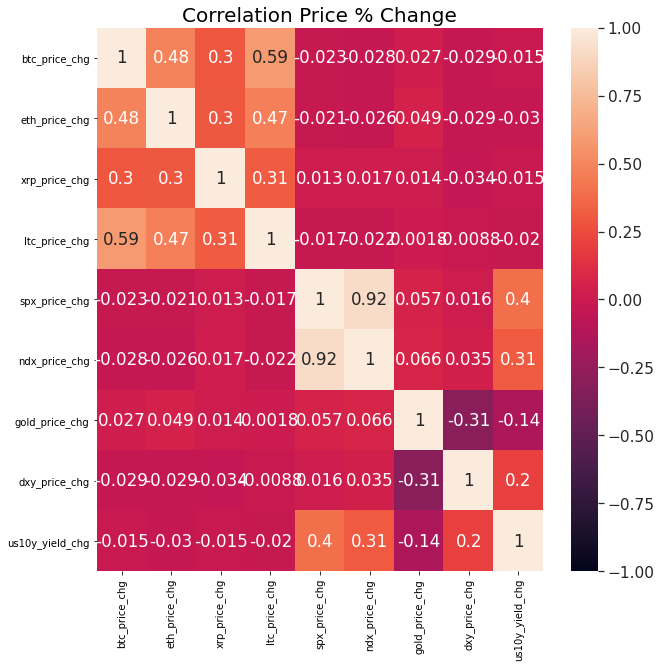

In [19]:
fig, axs = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.4)
sns.heatmap(price_pchg_df.corr(),vmin=-1,vmax=1,annot=True, ax=axs).set_title("Correlation Price % Change", size=20)

We can see clearly from the heat map, all the digital assets has close to zero or negative correlation with the traditional assets.

It indicates that it is difficult for us to predict cryptos price movemnets from the price movement of traditional assets. 

It is expected that most of the digital assets should have a positive correlation. The reason why Litecoin has the closest correlation to bitcoin is that their mechanics are close each other, while there are some difference between each other i.e. the Litecoin Network aims to process a block every 2.5 minutes rather than Bitcoin's 10 minutes. Also, the differing proof of work algorithm are used by each network. 

Source:
[Litecoin](https://en.wikipedia.org/wiki/Litecoin)

### Data visualization of price % changes by clustering

In addition to correlation heatmap, we implemented cluster analysis to grab which groups of cryptos and asset classes can move similarly. As results, we can find below insights.


*   XRP didn't fall into any groups. 
*   BTC and LTC can have close relationship.
*   ETH can have relatively close relationship with BTC & LTC group.
*   Between traditional asset classes ('spx','ndx','gold','dxy','us10y') and cryptos ('btc','eth','xrp'), it looks that there isn't strong relationship.
*   Within traditional asset classes ('spx','ndx','gold','dxy','us10y'), 'spx' and 'ndx' can fall into same category. Also, 'gold' and 'dxy' can be categorized as same bucket. 'us10y' can have weak relationship with other 4 traditional asset classes but not much strong relationship. Those are logical as following reasons:

1.   Both spx and ndx are equity indexes.
2.   Both gold and dxy are currencies.
3.   'us10y' is interest rate, which has different properties from price indeces such as spx, ndx, gold, and dxy.










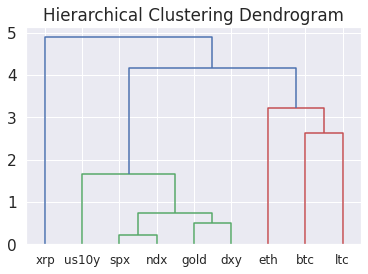

In [20]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

price_pchg_cluster_df = price_pchg_df.drop('day', axis=1)
price_pchg_cluster_df = price_pchg_cluster_df.fillna(0.0).T

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(price_pchg_cluster_df)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
labels = ['btc','eth','xrp','ltc','spx','ndx','gold','dxy','us10y']
plot_dendrogram(model, truncate_mode='level', p=4,labels=labels)
plt.show()

### Observations from data visualizations.

From correlation heatmap and clustering analysis, we can find that relationship between traditional asset classes and cryptos are not strong and those move separately. Also, xrp moves totally separately from any other asset classes and cryptos.

From this finding, we decide that we start further analysis from eth, btc, and ltc. Considering that btc is the main crypto which has highest trading volume and market capitalization, we step our direction of research that we try to predict price movement of the ltc and eth as dependent variable y, while btc related data are set as explanatory variable x.

## Preliminary regression analysis in milestone 1.

#### Price Regression

After the milestone 1, the prof kindly adviced us to execute regression not by the prices themselves, but by the price % changes. However, as the record of our work in milestone 1, we maintain our preliminary regression analysis toward the prices.

In [21]:
btc_regression_df = price_df.loc[:,['day', 'btc_price', 'eth_price', 'ltc_price']]
btc_regression_df.describe()

,btc_price,eth_price,ltc_price
count,2405.0000,1692.0000,2405.0000
mean,4114.2827,223.0045,39.3451
std,4704.0514,232.0571,49.9277
min,68.0831,0.4330,1.1489
25%,416.8500,12.6622,3.7507
50%,1078.2747,180.6890,20.3577
75%,7538.5577,304.6159,57.0756
max,28837.2885,1410.0002,360.6618


From simple price regression, it looks that we see heteroscedasticy in price data i.e. variance can become larger as explanatory variable become bigger. When we further proceed to creating regression model, we should be aware of this point.

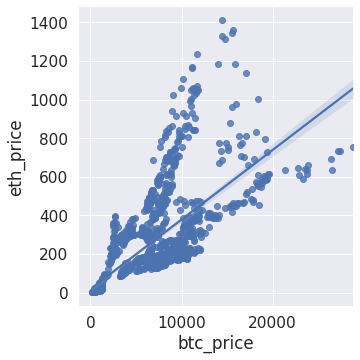

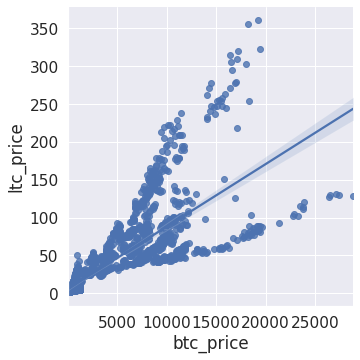

In [22]:
btc_regression_variables = ['eth_price', 'ltc_price']
for column in btc_regression_variables:
    temp_price_df = price_df.loc[:,['day', 'btc_price', column]]
    sns.lmplot(data=temp_price_df, x="btc_price", y=column)

### 0-1 Normilzation
x = (x - x.min)/(x.max - x.min)

(FYI: For data normalization, sklearn has convenient function of "preprocessing". When we deal with pandas dataframe, we should convert it into numpy arrays and reshape(-1,1) or (1,-1) before applying it.)

In [23]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

In [24]:
temp_reg_columns = ['btc_price', 'eth_price', 'ltc_price']

for value in temp_reg_columns:
  btc_regression_df['zeroOne_'+value] = scaler.fit_transform(btc_regression_df[value].to_numpy().reshape(-1,1))
    
btc_regression_df.tail()

,day,btc_price,eth_price,ltc_price,zeroOne_btc_price,zeroOne_eth_price,zeroOne_ltc_price
2400,2020-12-27,26476.1301,636.7423,129.7577,0.9179,0.4514,0.3577
2401,2020-12-28,26423.2288,689.6599,127.8991,0.9161,0.4890,0.3526
2402,2020-12-29,27125.3841,732.9570,130.6387,0.9405,0.5197,0.3602
2403,2020-12-30,27424.5390,735.5909,129.6282,0.9509,0.5215,0.3574
2404,2020-12-31,28837.2885,752.8559,129.2442,1.0000,0.5338,0.3563


Even after executing normalization, still heteroscedasticy exists. When we further proceed to creating regression model, we should be aware of this point.

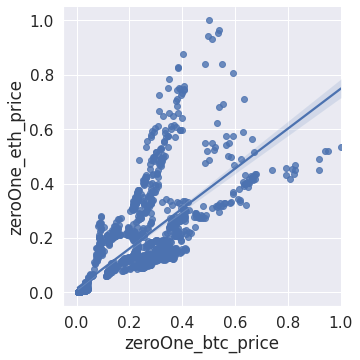

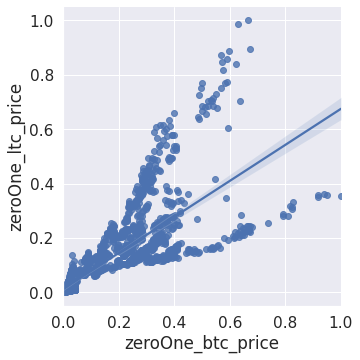

In [25]:
zeroOne_columns = ['zeroOne_eth_price', 'zeroOne_ltc_price']
for column in zeroOne_columns:
    temp_price_df = btc_regression_df.loc[:,['day', 'zeroOne_btc_price', column]]
    sns.lmplot(data=temp_price_df, x="zeroOne_btc_price", y=column)

### z-normalization

x = x - miu / std

(FYI: For data normalization, sklearn has convenient function of "preprocessing". When we deal with pandas dataframe, we should convert it into numpy arrays and reshape(-1,1) or (1,-1) before applying it.)

In [26]:
scaler = preprocessing.StandardScaler()

for value in temp_reg_columns:
  btc_regression_df['zNorm_'+value] = scaler.fit_transform(btc_regression_df[value].to_numpy().reshape(-1,1))
    
btc_regression_df.tail()

,day,btc_price,eth_price,ltc_price,zeroOne_btc_price,zeroOne_eth_price,zeroOne_ltc_price,zNorm_btc_price,zNorm_eth_price,zNorm_ltc_price
2400,2020-12-27,26476.1301,636.7423,129.7577,0.9179,0.4514,0.3577,4.7547,1.7834,1.8112
2401,2020-12-28,26423.2288,689.6599,127.8991,0.9161,0.4890,0.3526,4.7435,2.0115,1.7740
2402,2020-12-29,27125.3841,732.9570,130.6387,0.9405,0.5197,0.3602,4.8928,2.1982,1.8289
2403,2020-12-30,27424.5390,735.5909,129.6282,0.9509,0.5215,0.3574,4.9564,2.2095,1.8087
2404,2020-12-31,28837.2885,752.8559,129.2442,1.0000,0.5338,0.3563,5.2568,2.2840,1.8010


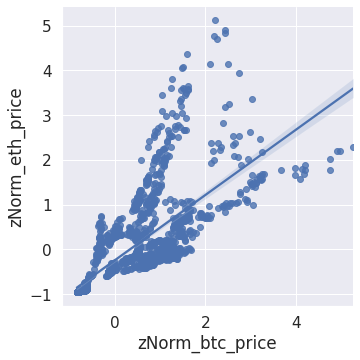

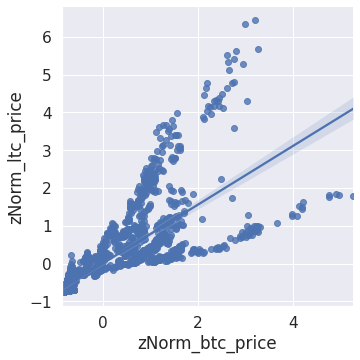

In [27]:
zeroNorm_columns = ['zNorm_eth_price', 'zNorm_ltc_price']
for column in zeroNorm_columns:
    temp_price_df = btc_regression_df.loc[:,['day', 'zNorm_btc_price', column]]
    sns.lmplot(data=temp_price_df, x="zNorm_btc_price", y=column)

In [28]:
sma100d_regression_df = main_df.loc[:,['day', 'btc_SMA100d', 'eth_SMA100d', 'ltc_SMA100d']]
sma100d_regression_df.describe()

,btc_SMA100d,eth_SMA100d,ltc_SMA100d
count,2320.0000,1607.0000,2320.0000
mean,3918.0324,220.3841,39.2160
std,4107.1327,211.5465,46.2011
min,105.4918,0.8169,1.6341
25%,418.9391,12.4014,3.8358
50%,1064.9473,182.9581,19.1176
75%,7977.8101,297.5355,55.0914
max,16168.5674,887.8297,215.8538


When we take moving average, price movement of x and y become smoother. It looks that below charts indicates some pattern in relationship between moving average x and y, which looks interesting and which can be valuable to search further.

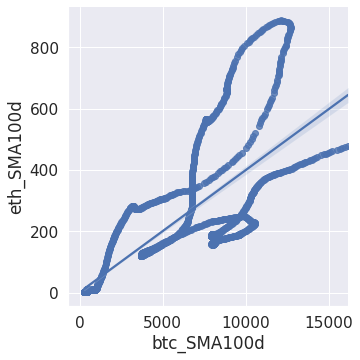

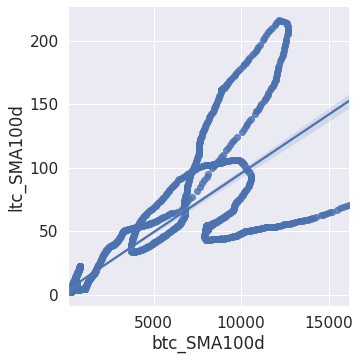

In [29]:
sma100d_regression_variables = ['eth_SMA100d', 'ltc_SMA100d']
for column in sma100d_regression_variables:
    temp_price_df = sma100d_regression_df.loc[:,['day', 'btc_SMA100d', column]]
    sns.lmplot(data=temp_price_df, x="btc_SMA100d", y=column)

In [30]:
sma50d_regression_df = main_df.loc[:,['day', 'btc_SMA50d', 'eth_SMA50d', 'ltc_SMA50d']]
sma50d_regression_df.describe()

,btc_SMA50d,eth_SMA50d,ltc_SMA50d
count,2363.0000,1650.0000,2363.0000
mean,3991.8709,220.7913,39.1383
std,4327.6941,221.1406,47.6840
min,94.9140,0.7286,1.4638
25%,418.2572,12.5393,3.7921
50%,1111.7941,183.0707,19.9701
75%,7680.1948,299.1114,56.4948
max,20102.0409,1031.4014,248.9804


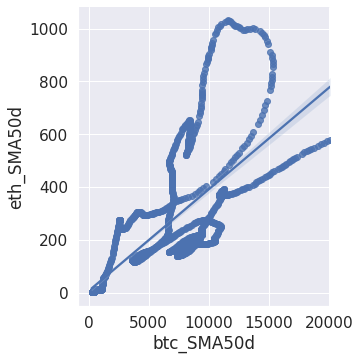

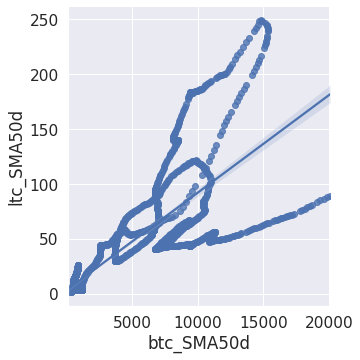

In [31]:
sma50d_regression_variables = ['eth_SMA50d', 'ltc_SMA50d']
for column in sma50d_regression_variables:
    temp_price_df = sma50d_regression_df.loc[:,['day', 'btc_SMA50d', column]]
    sns.lmplot(data=temp_price_df, x="btc_SMA50d", y=column)

In [32]:
sma200d_regression_df = main_df.loc[:,['day', 'btc_SMA200d', 'eth_SMA200d', 'ltc_SMA200d']]
sma200d_regression_df.describe()

,btc_SMA200d,eth_SMA200d,ltc_SMA200d
count,2234.0000,1522.0000,2234.0000
mean,3831.9396,221.6862,39.6146
std,3840.4893,196.8880,43.6288
min,131.1471,1.3679,1.9206
25%,462.7458,23.8589,3.9104
50%,1204.9422,185.1087,16.7069
75%,8010.4416,294.1371,58.5946
max,13284.9348,725.4063,173.1697


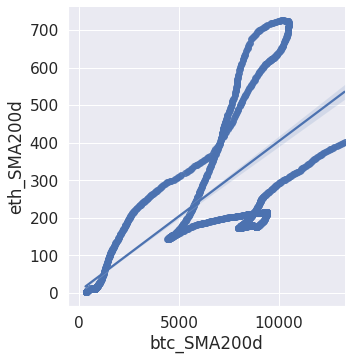

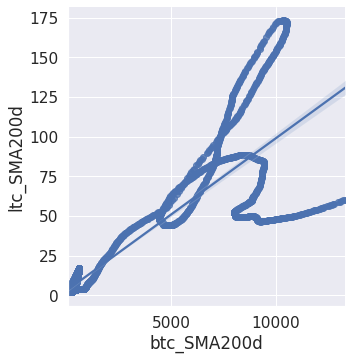

In [33]:
sma200d_regression_variables = ['eth_SMA200d', 'ltc_SMA200d']
for column in sma200d_regression_variables:
    temp_price_df = sma200d_regression_df.loc[:,['day', 'btc_SMA200d', column]]
    sns.lmplot(data=temp_price_df, x="btc_SMA200d", y= column)

In [34]:
sma10d_regression_df = main_df.loc[:,['day', 'btc_SMA10d', 'eth_SMA10d', 'ltc_SMA10d']]
sma10d_regression_df.describe()

,btc_SMA10d,eth_SMA10d,ltc_SMA10d
count,2397.0000,1685.0000,2397.0000
mean,4084.9766,222.3742,39.2885
std,4606.0905,230.1287,49.5273
min,79.0102,0.5146,1.3374
25%,417.6182,12.6792,3.7541
50%,1065.3315,180.0828,20.8925
75%,7473.6032,302.6766,57.0860
max,25466.1878,1278.3328,317.1743


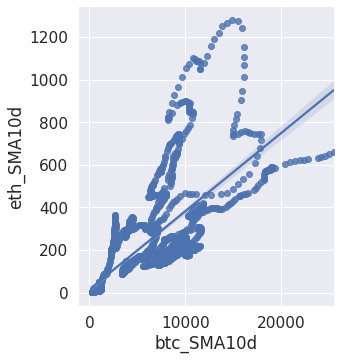

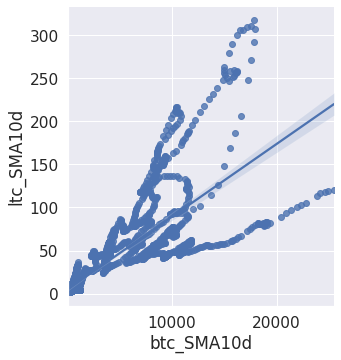

In [35]:
sma10d_regression_variables = ['eth_SMA10d', 'ltc_SMA10d']
for column in sma10d_regression_variables:
    temp_price_df = sma10d_regression_df.loc[:,['day', 'btc_SMA10d', column]]
    sns.lmplot(data=temp_price_df, x="btc_SMA10d", y=column)

Even with moving average, we see heteroscedasticy and variance changes as explanatory variables become larger. However, we can also see that there may be some pattern of moving average between x and y. Lets try to do a normalization on the sma50d and replot the scatter plot.

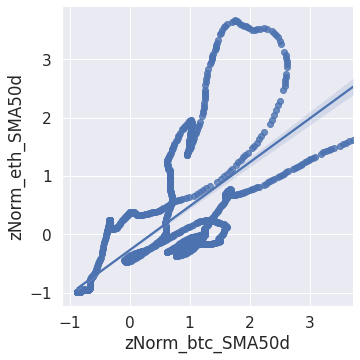

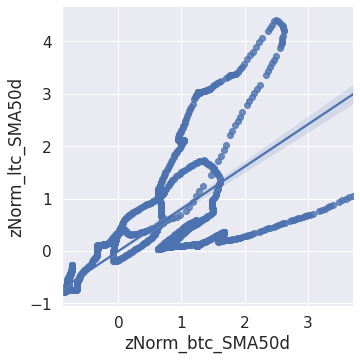

In [36]:
temp_reg_columns = ['btc_SMA50d', 'eth_SMA50d', 'ltc_SMA50d']

for value in temp_reg_columns:
    #sma50d_regression_df['zNorm_'+value] = (sma50d_regression_df[value] - sma50d_regression_df[value].mean())/sma50d_regression_df[value].std()
    sma50d_regression_df['zNorm_'+value] = scaler.fit_transform(sma50d_regression_df[value].to_numpy().reshape(-1,1))
    
sma50d_regression_df.tail()

zeroNorm_sma50d_columns = ['zNorm_eth_SMA50d', 'zNorm_ltc_SMA50d']
for column in zeroNorm_sma50d_columns:
    temp_price_df = sma50d_regression_df.loc[:,['zNorm_btc_SMA50d', column]]
    sns.lmplot(data=temp_price_df, x="zNorm_btc_SMA50d", y= column)

## Preliminary time series analysis

After the milestone 1, we've learned that we shoud not implement time-series analysis toward the prices themselves which cannot realize the stationality, but implement time-series analysis after achieving data stationality by taking log difference or price % changes. However, for recording purpose, we maintain our preliminary analysis of time-series in milestone 1.

In [37]:
from statsmodels import api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pylab

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [38]:
#Extract price data for cryptos and day.
crypto_price_df = main_df[['day','btc_price', 'eth_price', 'xrp_price', 'ltc_price']]
#set day as index
crypto_price_df['day'] = crypto_price_df['day'].astype("datetime64")  
crypto_price_df = crypto_price_df.set_index('day')
#set time frequency as Day = 'D' for executing time series analysis.
crypto_price_df = crypto_price_df.asfreq('D')
#Eliminate nan and fill previous day's price if nan.
crypto_price_df = crypto_price_df.fillna(method='ffill')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


First, we executed the decomposition of cryptos' price data (not % change). Unfortunately, we cannot find much trend or seasonal pattern in both the additive and multiplicative approaches.

However, it is curious that 'Residual' shows pattern like "keeping very quiet movement, then, price can change rapidly and keep volatile for a while, and then moving back to quiet". It implies that price itself doesn't have clear pattern of trend or seasonality but volatility can have some pattern.

We can examine seasonal pattern further after milestone 1 by utilizing time series analysis, because data that we deal with this time is time-series data.

Reference: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

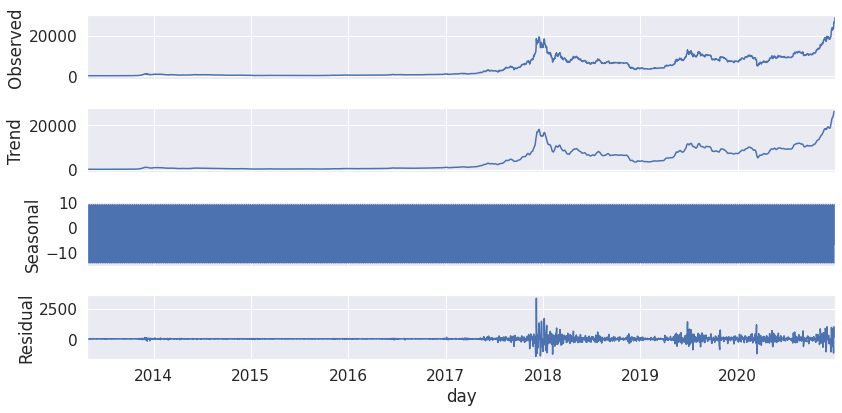

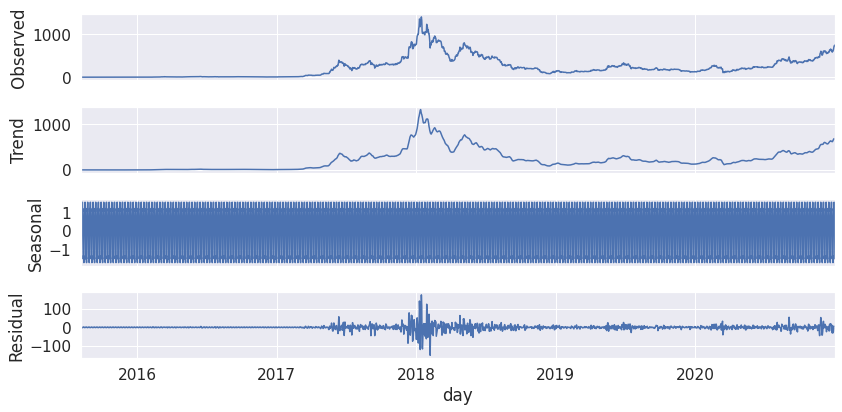

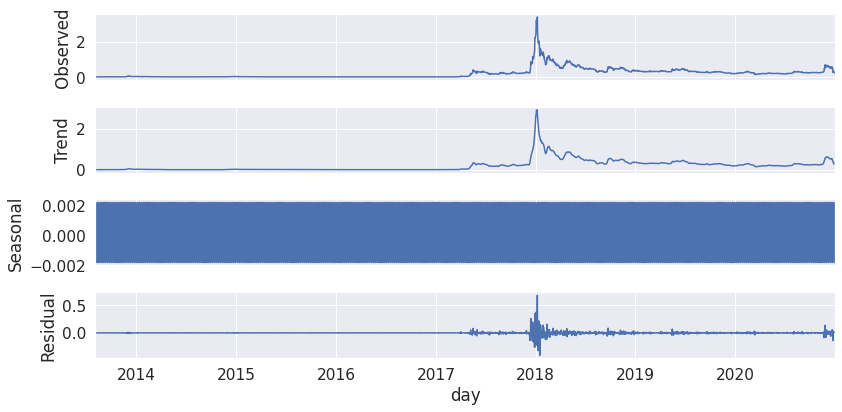

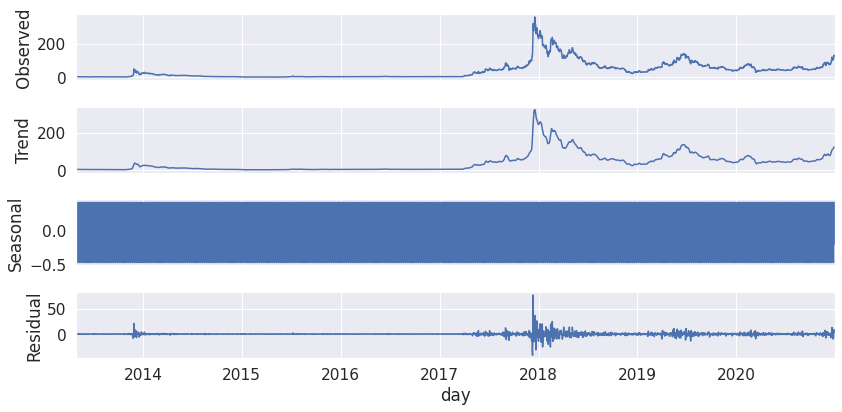

In [39]:
columns = ['btc_price', 'eth_price', 'xrp_price', 'ltc_price']

for column in columns:
  result = seasonal_decompose(crypto_price_df[column].dropna(), model='additive')
  pylab.rcParams['figure.figsize'] = (12, 6)
  result.plot()
  plt.show()

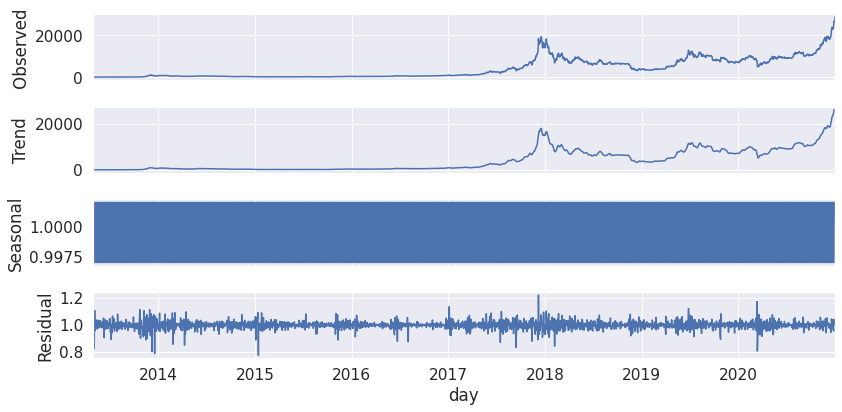

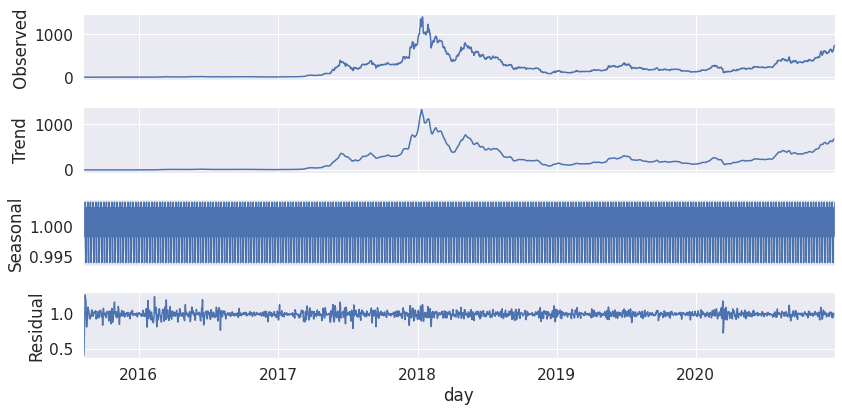

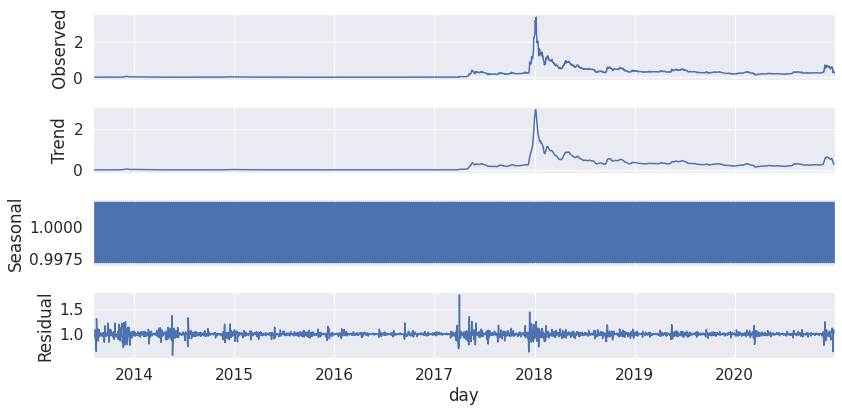

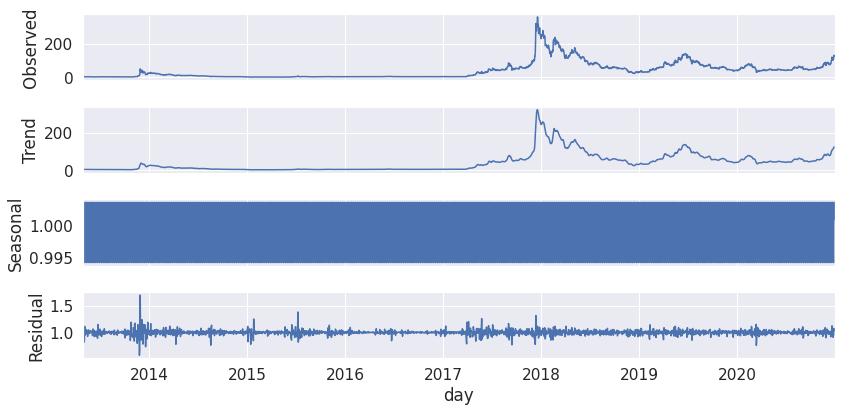

In [40]:
columns = ['btc_price', 'eth_price', 'xrp_price', 'ltc_price']

for column in columns:
  result = seasonal_decompose(crypto_price_df[column].dropna(), model='multiplicative')
  pylab.rcParams['figure.figsize'] = (12, 6)
  result.plot()
  plt.show()

Second, we executed auto-correlation on cryptos' price (not % change).

When we look at partial auto-correlation, t+1 has high autocorrelation. However, we should note that we did fillna by the method "ffill" i.e. if price is blank we filled previous day's price. This high autocorrelation on t+1 can happen due to this fillna method.

Also, we can find that some high / low partial autocorrelation around 1 week i.e. around t+4 - t+7. It can imply that there can exist some 1 week seasonality. It can be seen as interesting phenomena.

We can further examine time series relationship, utilizing more advanced methods such as ARIMA after the milestone 1.

Reference:
https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

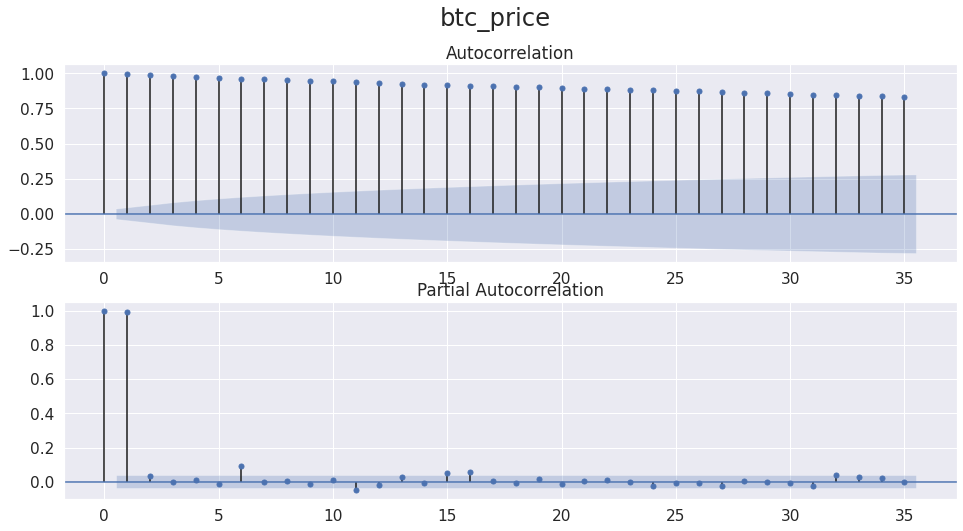

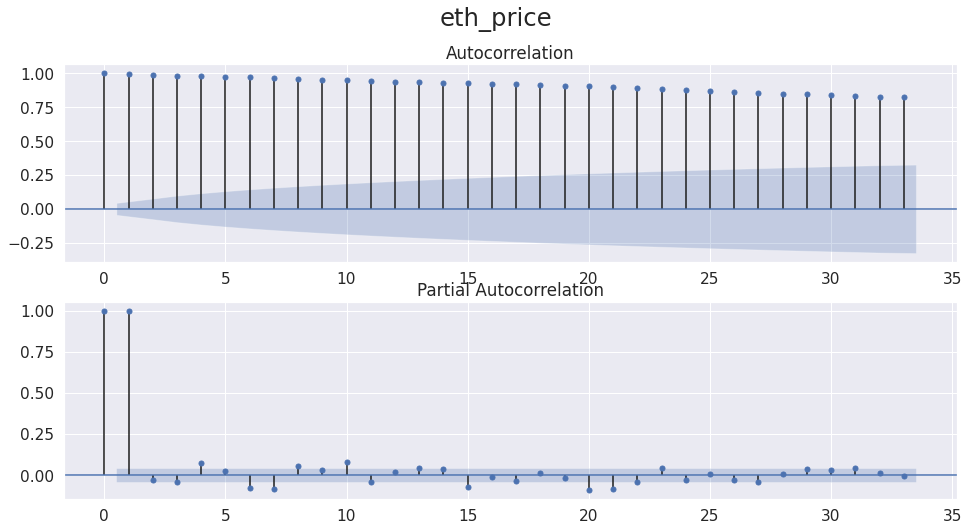

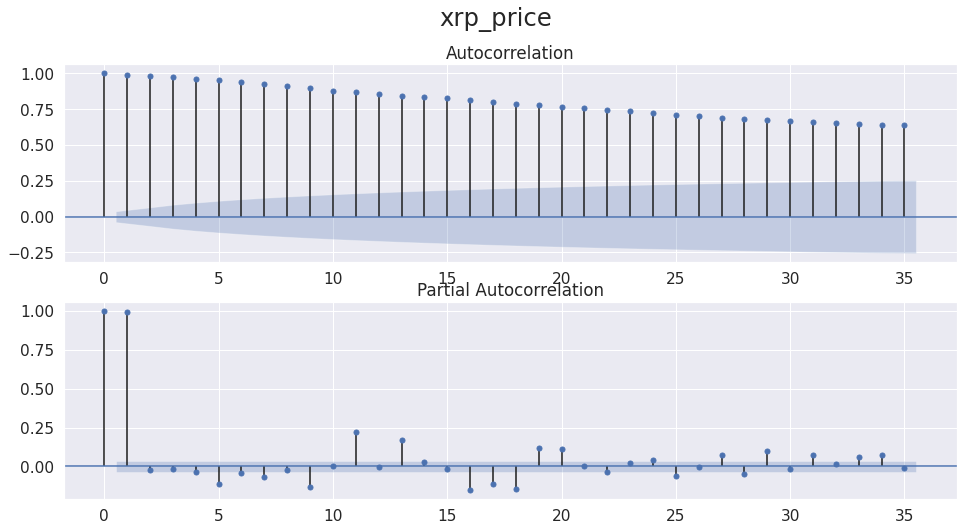

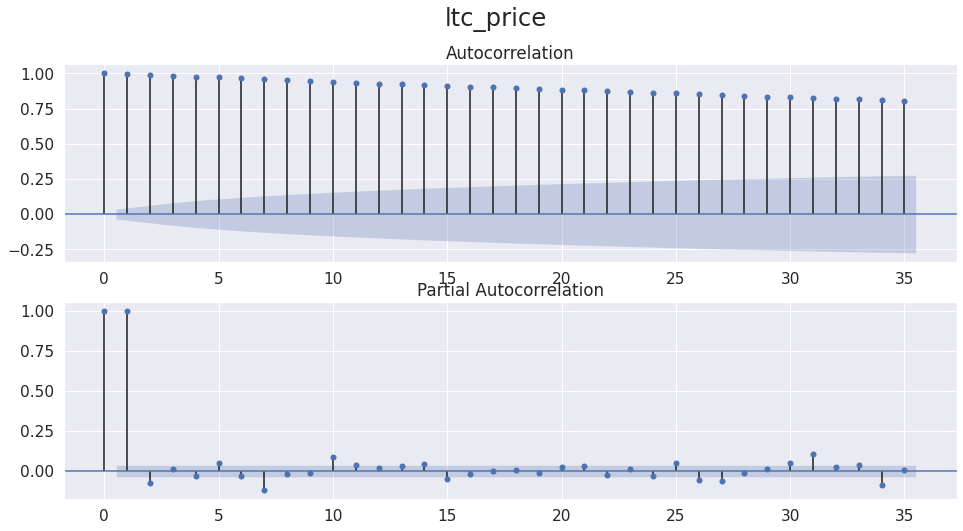

In [41]:
#Execution of auto-correlation.
for column in ['btc_price', 'eth_price', 'xrp_price', 'ltc_price']:

  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

  fig.suptitle(str(column), fontsize="x-large")
  # Raw data, ACF
  sm.tsa.graphics.plot_acf(crypto_price_df[column].dropna(), ax=axes[0])
  # Raw data, PACF
  sm.tsa.graphics.plot_pacf(crypto_price_df[column].dropna(), ax=axes[1])

  # Show graph
  plt.show()

## Conclusion, problem statements, and future direction after milestone 1.

**From our preliminary analysis before milestone 1, we found as followings:**


*   There doesn't exist strong relationship in price movement between traditional asset classes and cryptos.
*   xrp moves quite uniquely from all other asset classes / cryptos such that it can be difficult for us to predict price movement of xrp from those of other asset classes.
*   Among btc, ltc, and eth, it looks that there can exist some stronger relationship, while we should be aware of heteroscedasticy of data when we apply regression model.
*   From preliminary time series analysis, we could not meaningful seasonal patterns. However, it looks that there can exist some weekly seasonal pattern. Also, volatility of price can follows some pattern (keeping low volatility, rapidly spiking volatility and continuing high volatility for a while, then calming down again).


**Therefore, for our next step after milestone 1, our research direction can become as follows:**

*   Can we forecast ltc and/or eth price from btc data? How can we deal with heteroscedasticy in regression model? (Using model: Regression)
*   Can we find insightful seasonal pattern in each cryptos data for both price movement and volatility of price? (Using model: More advanced model of time series analysis)

**Also, we can explore following analysis / modeling too:**

*   Can we utilize PCA for price prediction of ltc and/or eth? For example, by aggregating traditional asset price data (spx, nasdaq, gold, dxy, 10 year interest rate) into smaller number of features, can we create some useful features to predict cryptos? (Using model: PCA)
* What were the news during late 2017, mid 2019, late 2020, that caused the price of bitcoin to increase sharply. And whar happened near 2018 that made the bitcoin price declined so drastically. (Qualitative analysis)

**In the modeling process, we can consider folloing points for further investigation:**

*   Can we utilize moving average and other smoothed data (such as trend, seasonality, and residuals in time-series decomposition) for the price prediction of cryptos such as ltc and/or eth?
* How much does the trading volume affect the price movement. Comparing the drastic increase vs the drastic decrease.

**While below is difficult, we may try to figure out following too.**

* Is there any trading strategy which can be profitable even in the future?